## Imports

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Data loading

In [2]:
df = pd.read_csv('no-show-hospital-data.csv')

## Data clean-up

Change data type of the PatientId variable to an integer.

In [3]:
df['PatientId'] = df.PatientId.astype(int)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Drop irrelevant variables

Unique appointment ID is useless for our analysis.

In [4]:
df.drop('AppointmentID', axis=1, inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Convert date columns to the date data type

In [5]:
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)

In [6]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Create days_between variable

Compute number of days between an appointment has been scheduled and it has actually taken place.

In [7]:
def days_between(x):
    start = x['ScheduledDay']
    end = x['AppointmentDay']
    delta = (end - start).days
    if delta < 0:
        return 0
    else:
        return delta

In [8]:
df['days_between'] = df.apply(days_between, axis=1)

In [11]:
df.sample(n=5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between
102894,235218244962377,M,2016-06-06 07:50:42,2016-06-07,27,SÃO PEDRO,0,0,0,0,0,0,Yes,0
20964,35963674577,M,2016-05-10 16:56:34,2016-05-18,22,BONFIM,0,0,0,0,0,0,Yes,7
54944,54861583155626,M,2016-04-26 08:35:42,2016-05-09,87,DA PENHA,0,1,0,0,0,0,No,12
42638,656854687466981,F,2016-04-27 10:43:02,2016-05-04,4,JABOUR,0,0,0,0,0,1,No,6
84408,8694748163753,F,2016-06-07 07:05:11,2016-06-07,34,MATA DA PRAIA,0,0,0,0,0,0,No,0


## Group neighbourhoods with few observations as Other

Group together neighbourhoods with fewer than 100 observations.

In [12]:
sizes = df.groupby('Neighbourhood').size().sort_values()
small_size = sizes[sizes < 100]
small_size

Neighbourhood
PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
PONTAL DE CAMBURI              69
MORADA DE CAMBURI              96
dtype: int64

In [19]:
df.replace(to_replace=small_size.keys(), inplace=True, value='OTHER')

Neighbourhood
PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
PONTAL DE CAMBURI              69
MORADA DE CAMBURI              96
dtype: int64

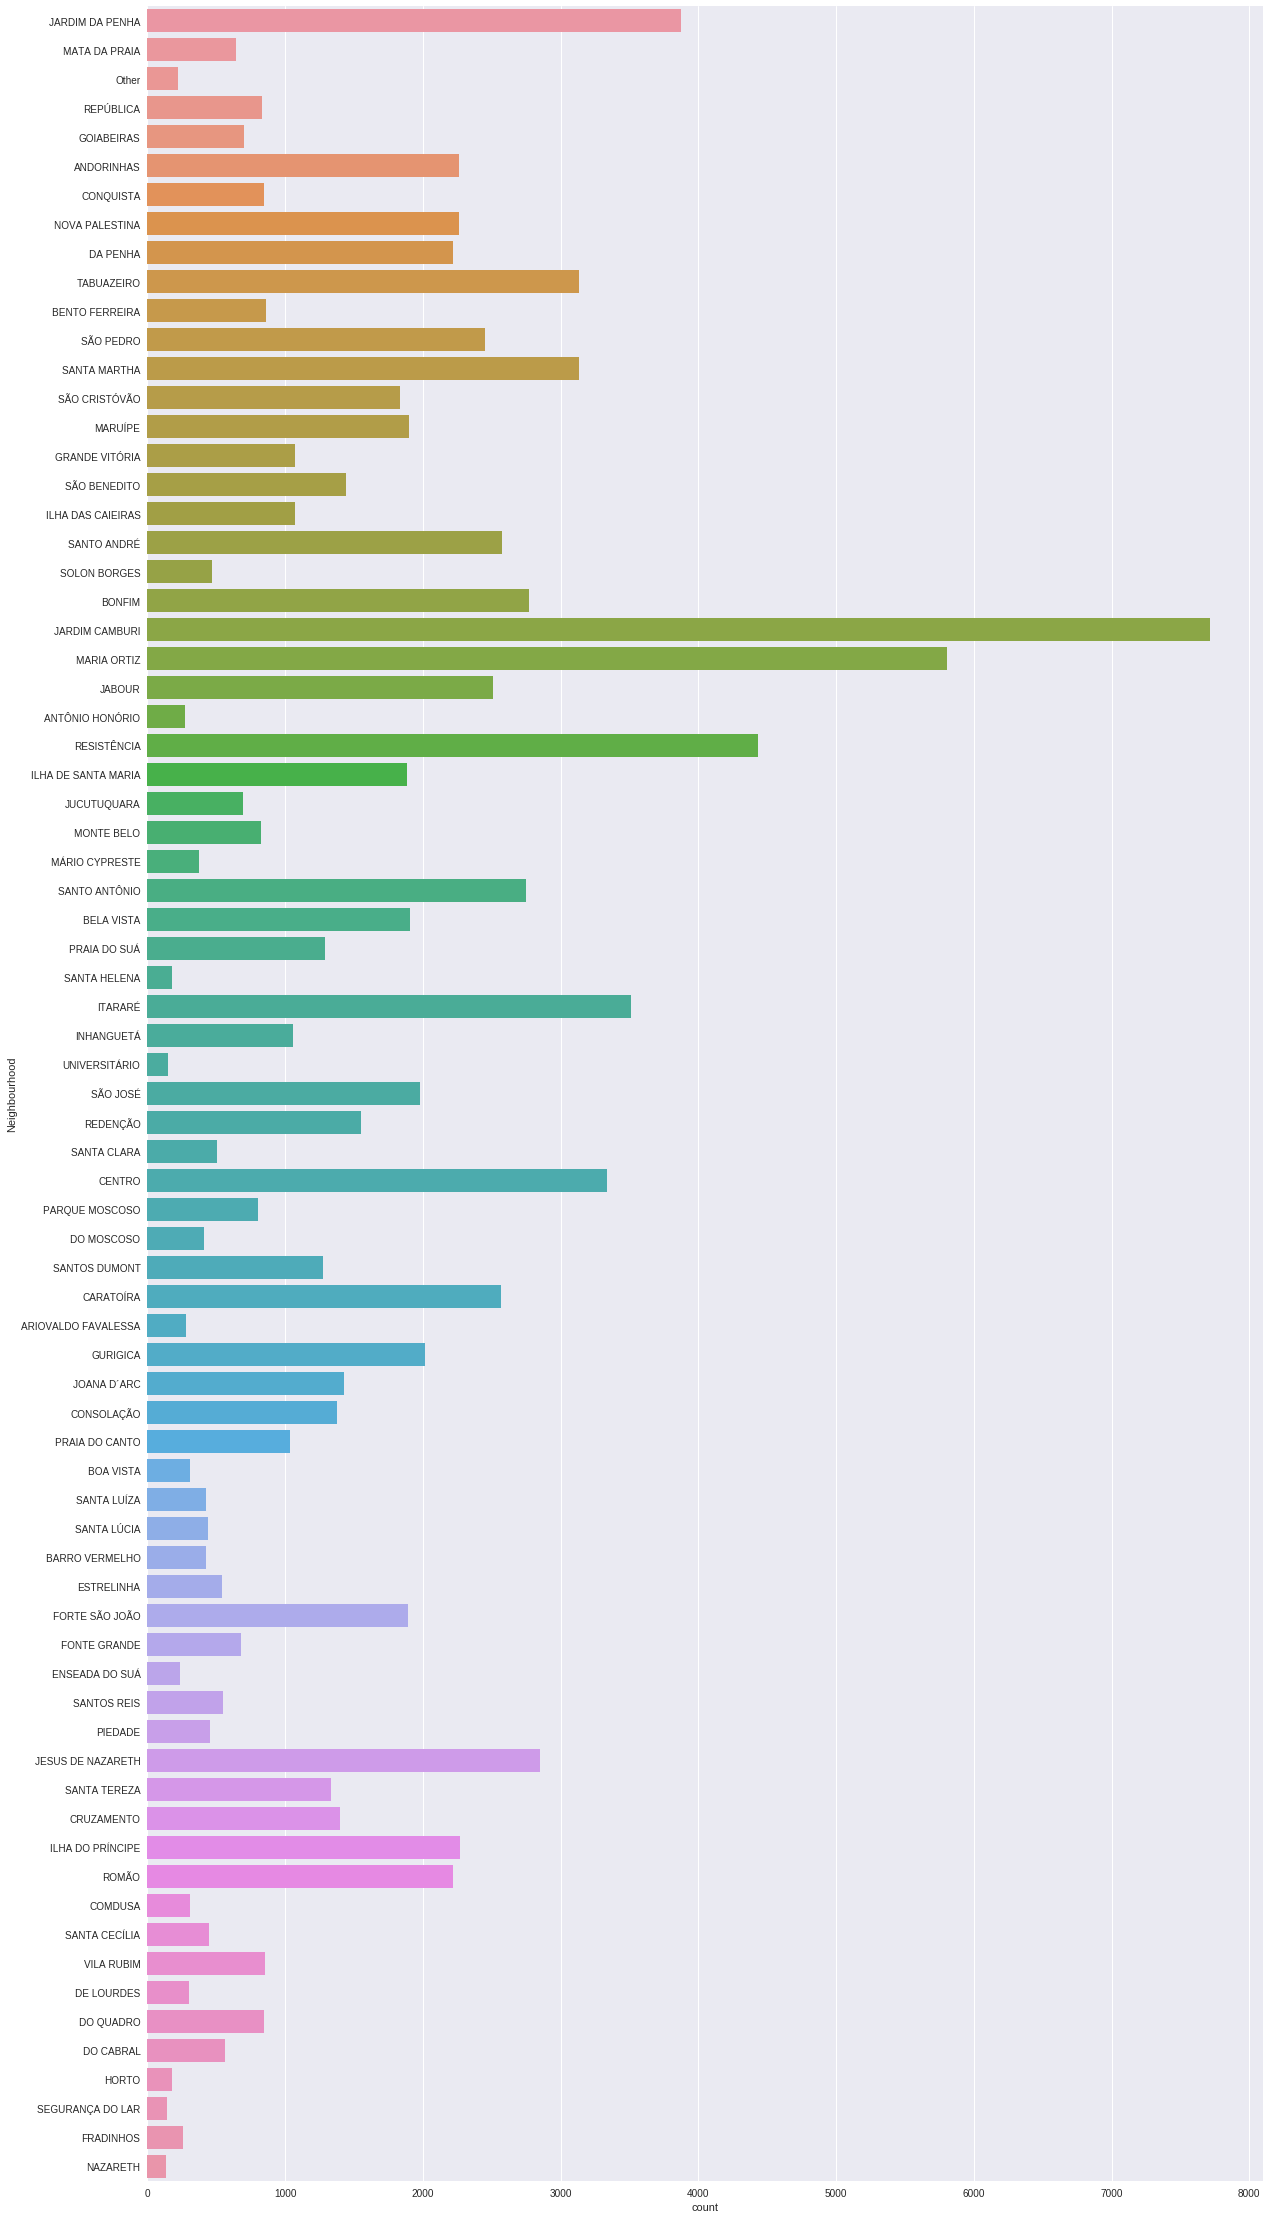

In [27]:
fig, ax = plt.subplots(figsize=(20, 40))
sns.countplot(y='Neighbourhood', data=df)
plt.show()

## Identify re-schedules

That's an appointment for the same patient that is scheduled after a no-show appointment.

In [51]:
# new variable indicates if previous appointment was a no-show
df.PrevNoShow = False
# go through all patients and all of their appointments
grouped = df.groupby('PatientId')
for name, group in grouped:
    sorted_by_appointment = group.sort_values(by='AppointmentDay')
    prev_no_show = False
    print(type(sorted_by_appointment))
    for appointment in sorted_by_appointment:
        print(appointment)
        if prev_no_show:
            appointment.PrevNoShow = True
            
        if appointment['No-show']:
            prev_no_show = True
        else:
            prev_no_show = False
            
    print(len(group))

<class 'pandas.core.frame.DataFrame'>
PatientId


TypeError: string indices must be integers